In [36]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [37]:
class_names= ['mantled_howler','patas_monkey','bald_uakari','japanese_macaque','pygmy_marmoset','white_headed_capuchin','silvery_marmoset','common_squirrel_monkey','black_headed_night_monkey','nilgiri_langur']
class_names_label={class_name:i for i, class_name in enumerate(class_names)}

In [38]:
nb_classes=len(class_names)
print(class_names_label)
IMAGE_SIZE=(200,200)

{'mantled_howler': 0, 'patas_monkey': 1, 'bald_uakari': 2, 'japanese_macaque': 3, 'pygmy_marmoset': 4, 'white_headed_capuchin': 5, 'silvery_marmoset': 6, 'common_squirrel_monkey': 7, 'black_headed_night_monkey': 8, 'nilgiri_langur': 9}


In [39]:
def load_data():
    DIRECTORY = r"C:\\Users\\vasu0\\Desktop\\lenovo data(descktop)\\MLLL\\Projects\\dogcat_new\\monkeydata"
    CATEGORY =['training','validation']
    
    
    output=[]
    
    
    for category in CATEGORY:
        path = os.path.join(DIRECTORY, category)
        print(path)
        images=[]
        labels=[]
        
        print("Loading  {}".format(category))
        
        
        for folder in os.listdir(path):
            label= class_names_label[folder]
            
            
            #Iterate through each image in our folder
            
            for file in os.listdir(os.path.join(path, folder)):
                        #Get path name of image 
                img_path= os.path.join(os.path.join(path, folder), file)
                     #open and resize image
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                
                #Append image and corresponding label to the out put                         
                images.append(image)
                labels.append(label)
        
        images = np.array(images , dtype="float32")
        labels = np.array(labels , dtype="int32")
                                         
                
            
        output.append((images,labels))
                                                                               
    return output        
    

In [40]:
(train_images,train_labels), (test_images,test_labels) = load_data()

C:\\Users\\vasu0\\Desktop\\lenovo data(descktop)\\MLLL\\Projects\\dogcat_new\\monkeydata\training
Loading  training
C:\\Users\\vasu0\\Desktop\\lenovo data(descktop)\\MLLL\\Projects\\dogcat_new\\monkeydata\validation
Loading  validation


In [41]:
train_images, train_labels =shuffle(train_images,train_labels, random_state=25)

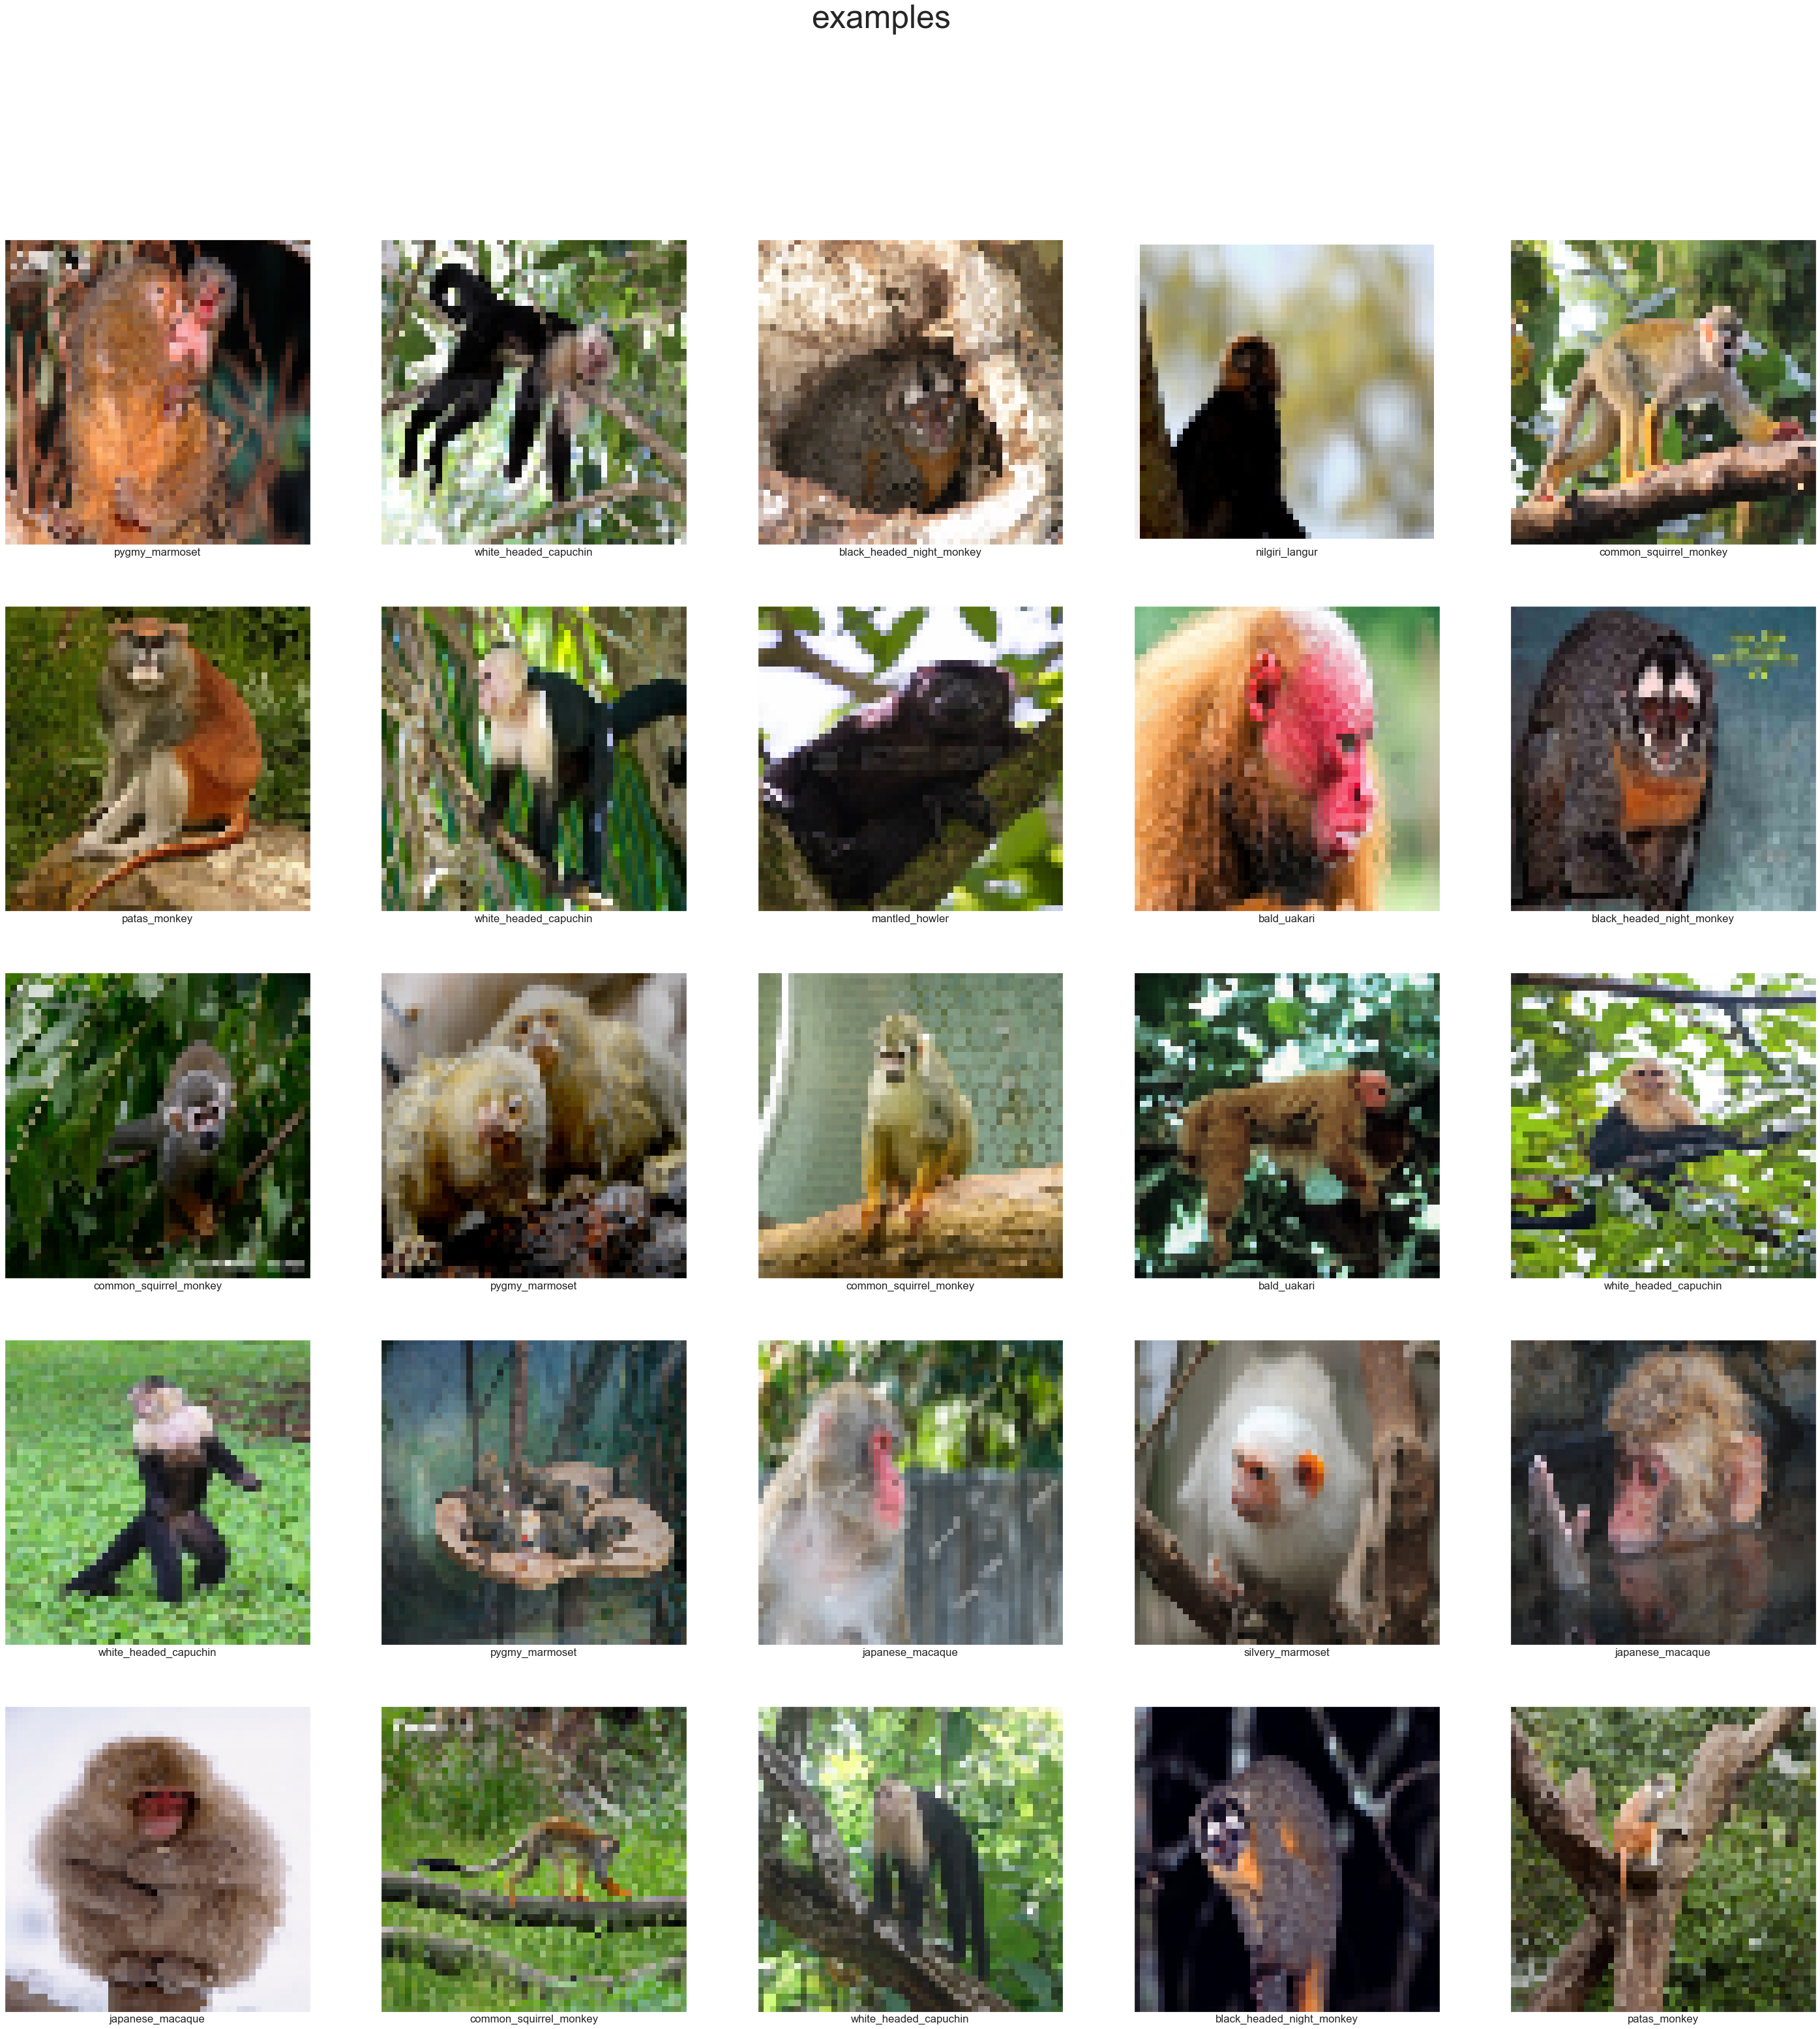

In [42]:
def display_example(class_names,images,labels):
    
    figsize = (50,50)
    fig = plt.figure(figsize=figsize)
    fig.suptitle('examples',fontsize=50)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        image = cv2.resize(images[i], figsize)
        plt.imshow(image.astype(np.uint8))
        plt.xlabel(class_names[labels[i]])
    plt.show()
display_example(class_names,train_images,train_labels)   
    

In [43]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation= tf.nn.relu),
    tf.keras.layers.Dense(10,activation= tf.nn.softmax),
    
])

In [44]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
history = model.fit(train_images,train_labels,batch_size=128, epochs=40,validation_split =0.2)

Epoch 1/40
7/7 [==============================] - 1s 108ms/step - loss: 1320.7356 - accuracy: 0.1002 - val_loss: 146.8652 - val_accuracy: 0.1136
Epoch 2/40
7/7 [==============================] - 1s 85ms/step - loss: 44.4850 - accuracy: 0.1503 - val_loss: 2.8327 - val_accuracy: 0.1136
Epoch 3/40
7/7 [==============================] - 1s 86ms/step - loss: 1.8329 - accuracy: 0.3850 - val_loss: 2.2126 - val_accuracy: 0.1909
Epoch 4/40
7/7 [==============================] - 1s 86ms/step - loss: 1.0002 - accuracy: 0.7358 - val_loss: 2.8148 - val_accuracy: 0.2864
Epoch 5/40
7/7 [==============================] - 1s 86ms/step - loss: 0.3077 - accuracy: 0.9362 - val_loss: 3.5460 - val_accuracy: 0.3000
Epoch 6/40
7/7 [==============================] - 1s 85ms/step - loss: 0.1098 - accuracy: 0.9875 - val_loss: 4.2965 - val_accuracy: 0.3136
Epoch 7/40
7/7 [==============================] - 1s 85ms/step - loss: 0.0408 - accuracy: 0.9920 - val_loss: 4.4102 - val_accuracy: 0.3364
Epoch 8/40
7/7 [====

In [46]:
def plot_accuracy(history):
    fig = plt.figure(figsize=(10,5))
    
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--',label= 'acc')
    plt.plot(history.history['val_accuracy'],'ro--',label='val_acc')
    plt.title('train_acc vs val_acc')
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--',label= 'loss')
    plt.plot(history.history['val_loss'],'ro--',label='val_loss')
    plt.title('train_loss vs val_loss')
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()
    
    

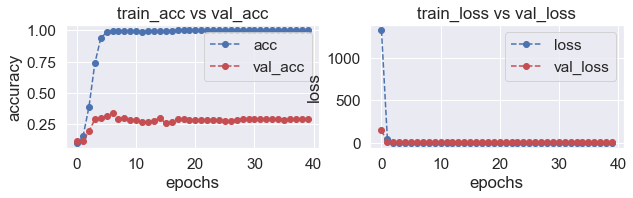

In [47]:
plot_accuracy(history)

In [48]:
test_loss= model.evaluate(test_images, test_labels)

9/9 [==============================] - 0s 8ms/step - loss: 8.5490 - accuracy: 0.3162


In [49]:
pred= model.predict(test_images)

In [50]:
pre_labels=np.argmax(pred,axis=1)
print(classification_report(test_labels,pre_labels))

              precision    recall  f1-score   support

           0       0.26      0.50      0.34        26
           1       0.26      0.29      0.27        28
           2       0.23      0.33      0.27        27
           3       0.35      0.27      0.30        30
           4       0.58      0.27      0.37        26
           5       0.33      0.25      0.29        28
           6       0.50      0.19      0.28        26
           7       0.22      0.29      0.25        28
           8       0.54      0.52      0.53        27
           9       0.32      0.27      0.29        26

    accuracy                           0.32       272
   macro avg       0.36      0.32      0.32       272
weighted avg       0.36      0.32      0.32       272



In [20]:
#vgg16

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model


model= VGG16(weights='imagenet', include_top= False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

58900480/58889256 [==============================] - 2s 0us/step


In [21]:
tran_features= model.predict(train_images)
test_features= model.predict(test_images)

In [27]:
from keras.layers import Input, Dense, Conv2D, Activation, MaxPooling2D, Flatten

model2= VGG16(weights='imagenet', include_top=False)
input_shape= model2.layers[-4].get_input_shape_at(0)
layer_input= Input(shape=(12,12,512))
x= layer_input
for layer in model2.layers[-4::1]:
    x=layer(x)
    
x=Conv2D(64,(3,3), activation='relu')(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x= Dense(100,activation='relu')(x)
x=Dense(10,activation='softmax')(x)


#create new model

new_model= Model(layer_input,x)


In [28]:
new_model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
history = new_model.fit(tran_features,train_labels,batch_size=128, epochs=10,validation_split =0.2)

Epoch 1/10
7/7 [==============================] - 1s 72ms/step - loss: 2.3009 - accuracy: 0.1105 - val_loss: 2.3066 - val_accuracy: 0.1136
Epoch 2/10
7/7 [==============================] - 0s 62ms/step - loss: 2.3010 - accuracy: 0.1105 - val_loss: 2.3066 - val_accuracy: 0.1136
Epoch 3/10
7/7 [==============================] - 0s 62ms/step - loss: 2.3010 - accuracy: 0.1105 - val_loss: 2.3066 - val_accuracy: 0.1136
Epoch 4/10
7/7 [==============================] - 0s 62ms/step - loss: 2.3010 - accuracy: 0.1105 - val_loss: 2.3066 - val_accuracy: 0.1136
Epoch 5/10
7/7 [==============================] - 0s 62ms/step - loss: 2.3009 - accuracy: 0.1105 - val_loss: 2.3066 - val_accuracy: 0.1136
Epoch 6/10
7/7 [==============================] - 0s 62ms/step - loss: 2.3010 - accuracy: 0.1105 - val_loss: 2.3066 - val_accuracy: 0.1136
Epoch 7/10
7/7 [==============================] - 0s 62ms/step - loss: 2.3009 - accuracy: 0.1105 - val_loss: 2.3066 - val_accuracy: 0.1136
Epoch 8/10
7/7 [===========

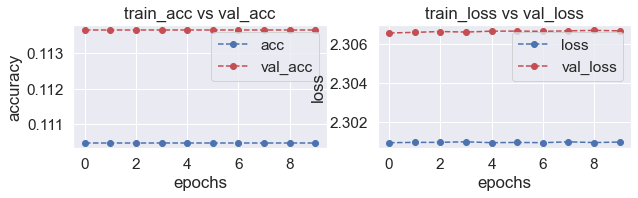

In [32]:
plot_accuracy(history)